In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data 
import yfinance as yf
from datetime import date

In [6]:
start = '2013-01-01'
end = date.today()
yf.pdr_override()
user = input('Enter stock ticter')
df= yf.download(user,start,end)
df.head(10)

Enter stock ticterAAPL
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.837116,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.624596,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.161520,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.066454,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.109694,458707200
2013-01-09,18.660713,18.750357,18.428213,18.467857,15.857924,407604400
2013-01-10,18.876785,18.882856,18.411428,18.696787,16.054499,601146000
2013-01-11,18.607143,18.761429,18.536428,18.582144,15.956056,350506800
2013-01-14,17.952856,18.125000,17.803928,17.919643,15.387179,734207600


In [7]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.837116,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.624596,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.161520,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.066454,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.109694,458707200


In [7]:
#df = df.drop(['Adj Close','Date'],axis=1 )
#df.head()

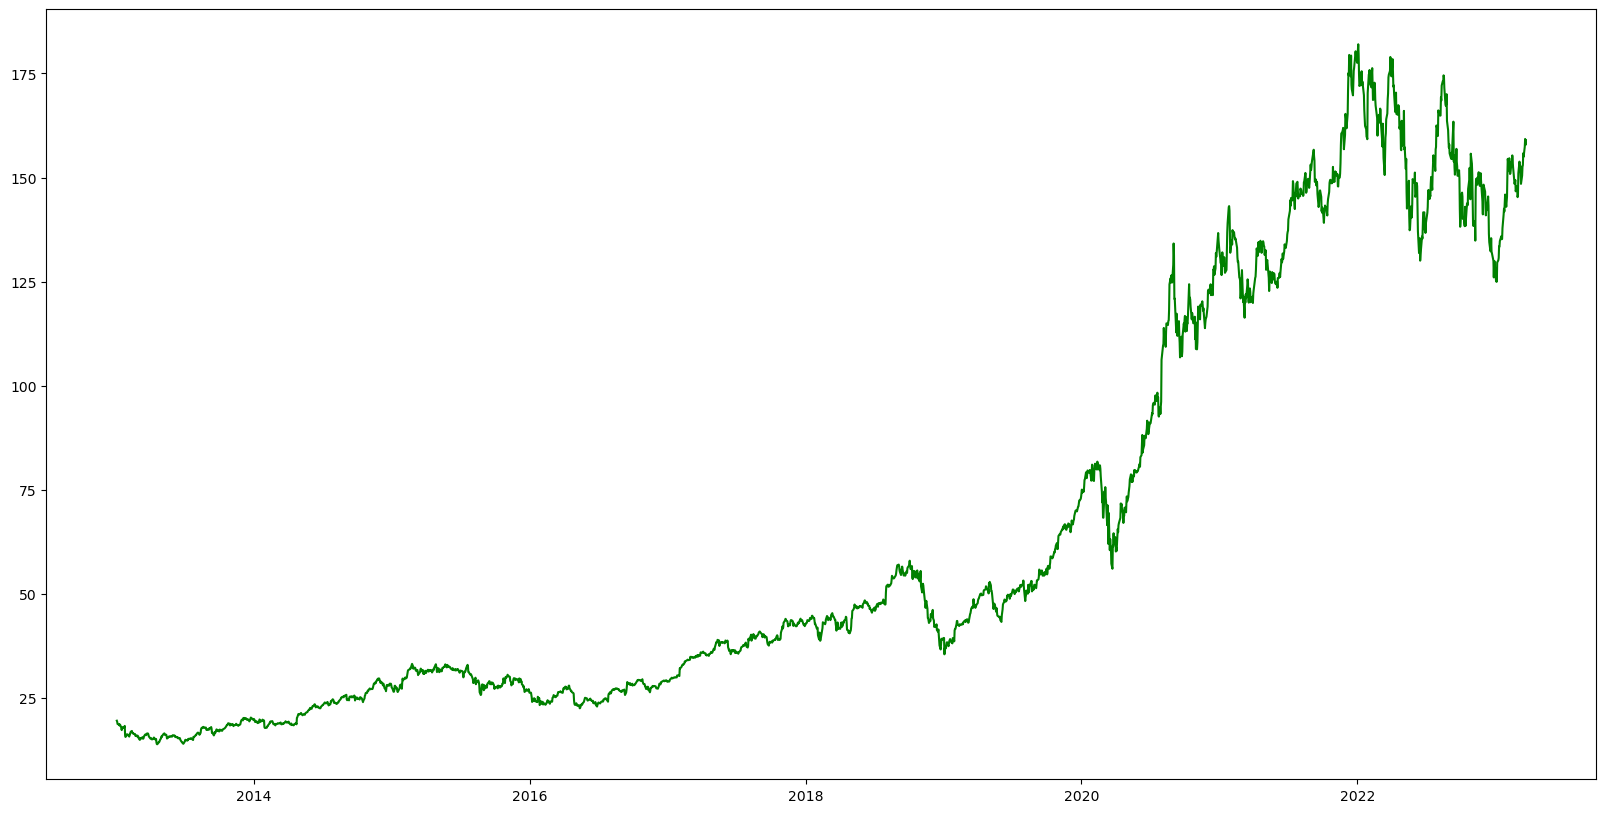

In [8]:
plt.figure(figsize = (20,10))
plt.plot(df.Date,df.Close,'g')
plt.show()

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2569    144.136600
2570    144.216099
2571    144.285499
2572    144.370299
2573    144.511599
Name: Close, Length: 2574, dtype: float64

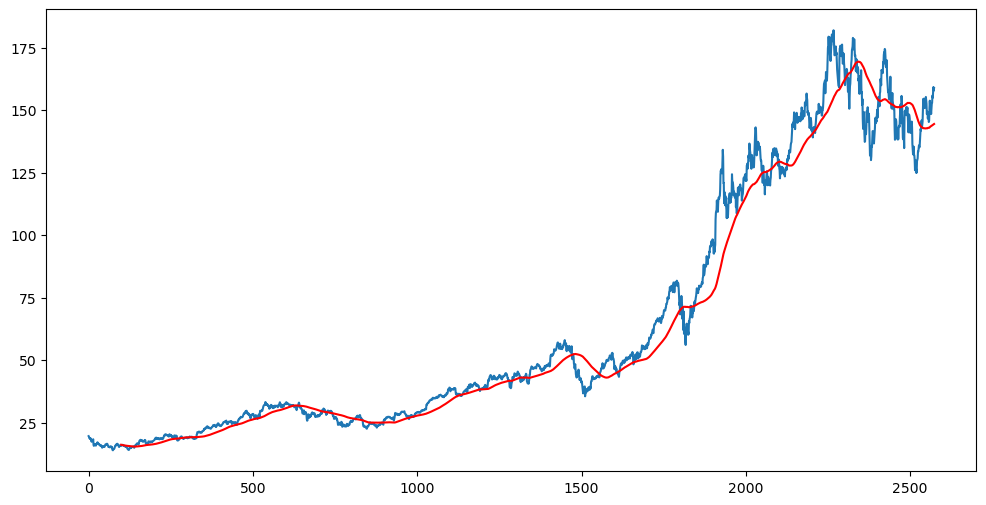

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
df.shape

(2574, 7)

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200 

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2569    147.67260
2570    147.71605
2571    147.75640
2572    147.81865
2573    147.88260
Name: Close, Length: 2574, dtype: float64

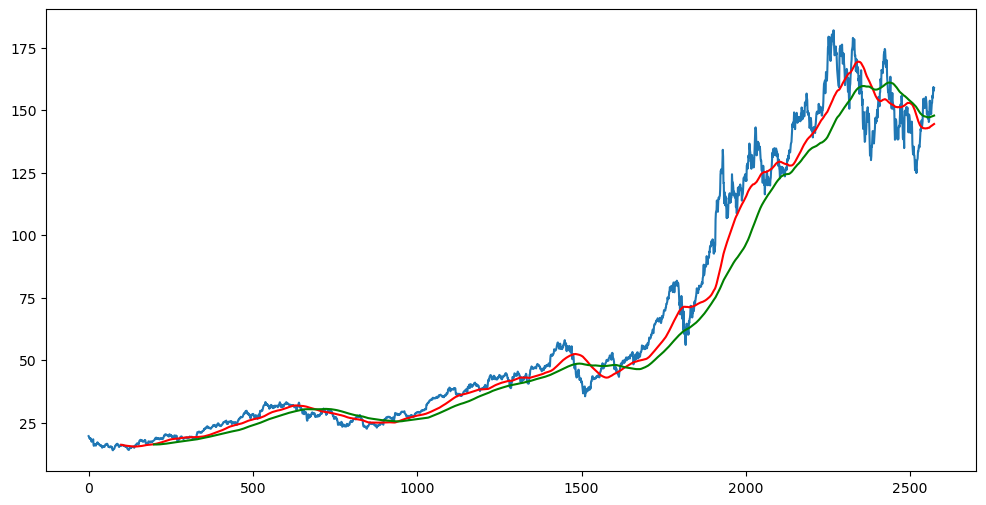

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200 ,'g')

In [14]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1801, 1)
(773, 1)


In [15]:
data_training.head()

,Close
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070


In [16]:
data_testing.head()

,Close
1801,68.339996
1802,74.702499
1803,72.330002
1804,75.684998
1805,73.230003


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.08342674],
       [0.07977913],
       [0.07183122],
       ...,
       [0.85586373],
       [0.87270175],
       [0.80221797]])

In [18]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train , y_train = np.array(x_train) , np.array(y_train)

In [19]:
from keras.layers import Dense ,Dropout ,LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units = 50 , activation ='relu' ,return_sequences = True, input_shape=(x_train.shape[1],1)))

model.add(Dropout(0.2))


model.add(LSTM(units = 60 , activation ='relu' ,return_sequences = True))

model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation ='relu' ,return_sequences = True))

model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation ='relu'))

model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer = 'adam' , loss ='mean_squared_error')
model.fit(x_train , y_train,epochs =50)

Epoch 1/50
54/54 [==============================] - 22s 349ms/step - loss: 0.0242
Epoch 2/50
54/54 [==============================] - 19s 343ms/step - loss: 0.0051
Epoch 3/50
54/54 [==============================] - 15s 276ms/step - loss: 0.0059
Epoch 4/50
54/54 [==============================] - 19s 346ms/step - loss: 0.0062
Epoch 5/50
54/54 [==============================] - 20s 373ms/step - loss: 0.0052
Epoch 6/50
54/54 [==============================] - 17s 311ms/step - loss: 0.0039
Epoch 7/50
54/54 [==============================] - 17s 307ms/step - loss: 0.0047
Epoch 8/50
54/54 [==============================] - 16s 300ms/step - loss: 0.0038
Epoch 9/50
54/54 [==============================] - 16s 294ms/step - loss: 0.0034
Epoch 10/50
54/54 [==============================] - 17s 320ms/step - loss: 0.0040
Epoch 11/50
54/54 [==============================] - 16s 301ms/step - loss: 0.0029
Epoch 12/50
54/54 [==============================] - 17s 315ms/step - loss: 0.0030
Epoch 13/50
5

In [22]:
model.save('kera_model.h5')

In [23]:
data_testing.head()

,Close
1801,44.532665
1802,49.574669
1803,49.700668
1804,49.966667
1805,48.302666


In [24]:
past_100_days = data_training.tail(100)

In [25]:
final_df = past_100_days.append(data_testing,ignore_index=True)

C:\Users\meanu\AppData\Local\Temp\ipykernel_17376\3976939425.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [26]:
final_df.head()

,Close
0,15.428667
1,15.848000
2,16.003332
3,16.302000
4,16.316000


In [1]:
input_data = scaler.transform(final_df)
input_data

NameError: name 'scaler' is not defined

In [37]:
input_data.shape

(873, 1)

In [38]:
x_test=[]
y_test=[]

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])
    
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(773, 100, 1)
(773,)


In [39]:
y_predicted = model.predict(x_test)

y_predicted.shape

25/25 [==============================] - 2s 73ms/step


(773, 1)

In [40]:
y_test

array([0.07376666, 0.08654607, 0.08686543, 0.08753962, 0.08332206,
       0.0797635 , 0.06363   , 0.06993775, 0.06806216, 0.05561225,
       0.05325847, 0.0360993 , 0.03358668, 0.02193095, 0.03315411,
       0.03313552, 0.03427778, 0.04622583, 0.05201314, 0.05013923,
       0.04780742, 0.04574088, 0.04943631, 0.04226511, 0.03768764,
       0.0420032 , 0.04812508, 0.05306077, 0.05363358, 0.05771596,
       0.07088738, 0.08084662, 0.08421594, 0.08681473, 0.08828142,
       0.08700905, 0.07693153, 0.08460119, 0.0801268 , 0.08342514,
       0.09586152, 0.09085486, 0.09615891, 0.09301095, 0.07939852,
       0.08951491, 0.0907011 , 0.09312924, 0.09270004, 0.09935418,
       0.09798043, 0.09766277, 0.09454523, 0.09663541, 0.09593249,
       0.09837584, 0.09742621, 0.09870195, 0.10073638, 0.098925  ,
       0.09926125, 0.09949105, 0.09705447, 0.10198678, 0.11264895,
       0.10985415, 0.1100907 , 0.10695119, 0.11054693, 0.1214051 ,
       0.11984211, 0.13410003, 0.12527797, 0.11893135, 0.12832

In [41]:
y_predicted

array([[0.15390624],
       [0.1542765 ],
       [0.15424833],
       [0.15387559],
       [0.15324122],
       [0.15242593],
       [0.15149191],
       [0.15045257],
       [0.14932705],
       [0.14813906],
       [0.14689332],
       [0.14559366],
       [0.14422335],
       [0.14277114],
       [0.14122428],
       [0.13960542],
       [0.13795525],
       [0.13631284],
       [0.13474792],
       [0.13333434],
       [0.13211909],
       [0.13110642],
       [0.13028672],
       [0.12964585],
       [0.12915063],
       [0.12875609],
       [0.12842974],
       [0.128162  ],
       [0.127962  ],
       [0.12784114],
       [0.12781356],
       [0.12792608],
       [0.12825264],
       [0.12885405],
       [0.12975994],
       [0.13096365],
       [0.1324166 ],
       [0.13400963],
       [0.13564676],
       [0.13723345],
       [0.13870062],
       [0.1400481 ],
       [0.14128132],
       [0.1424238 ],
       [0.143487  ],
       [0.14442559],
       [0.14522146],
       [0.145

In [42]:
scaler.scale_

array([0.00253459])

In [43]:
scale_factor = 1/0.01695854
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

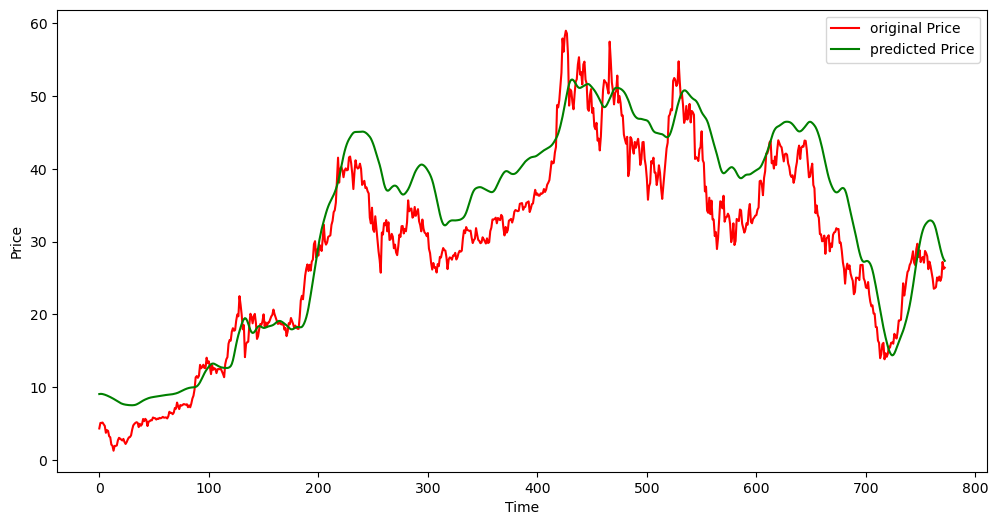

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test ,'r',label='original Price')
plt.plot(y_predicted ,'g',label='predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
